## Import neccessary library


In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from io import BytesIO

# Data preprocessing

In [76]:
base_dir = os.path.join(os.getcwd(),"data")
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation")

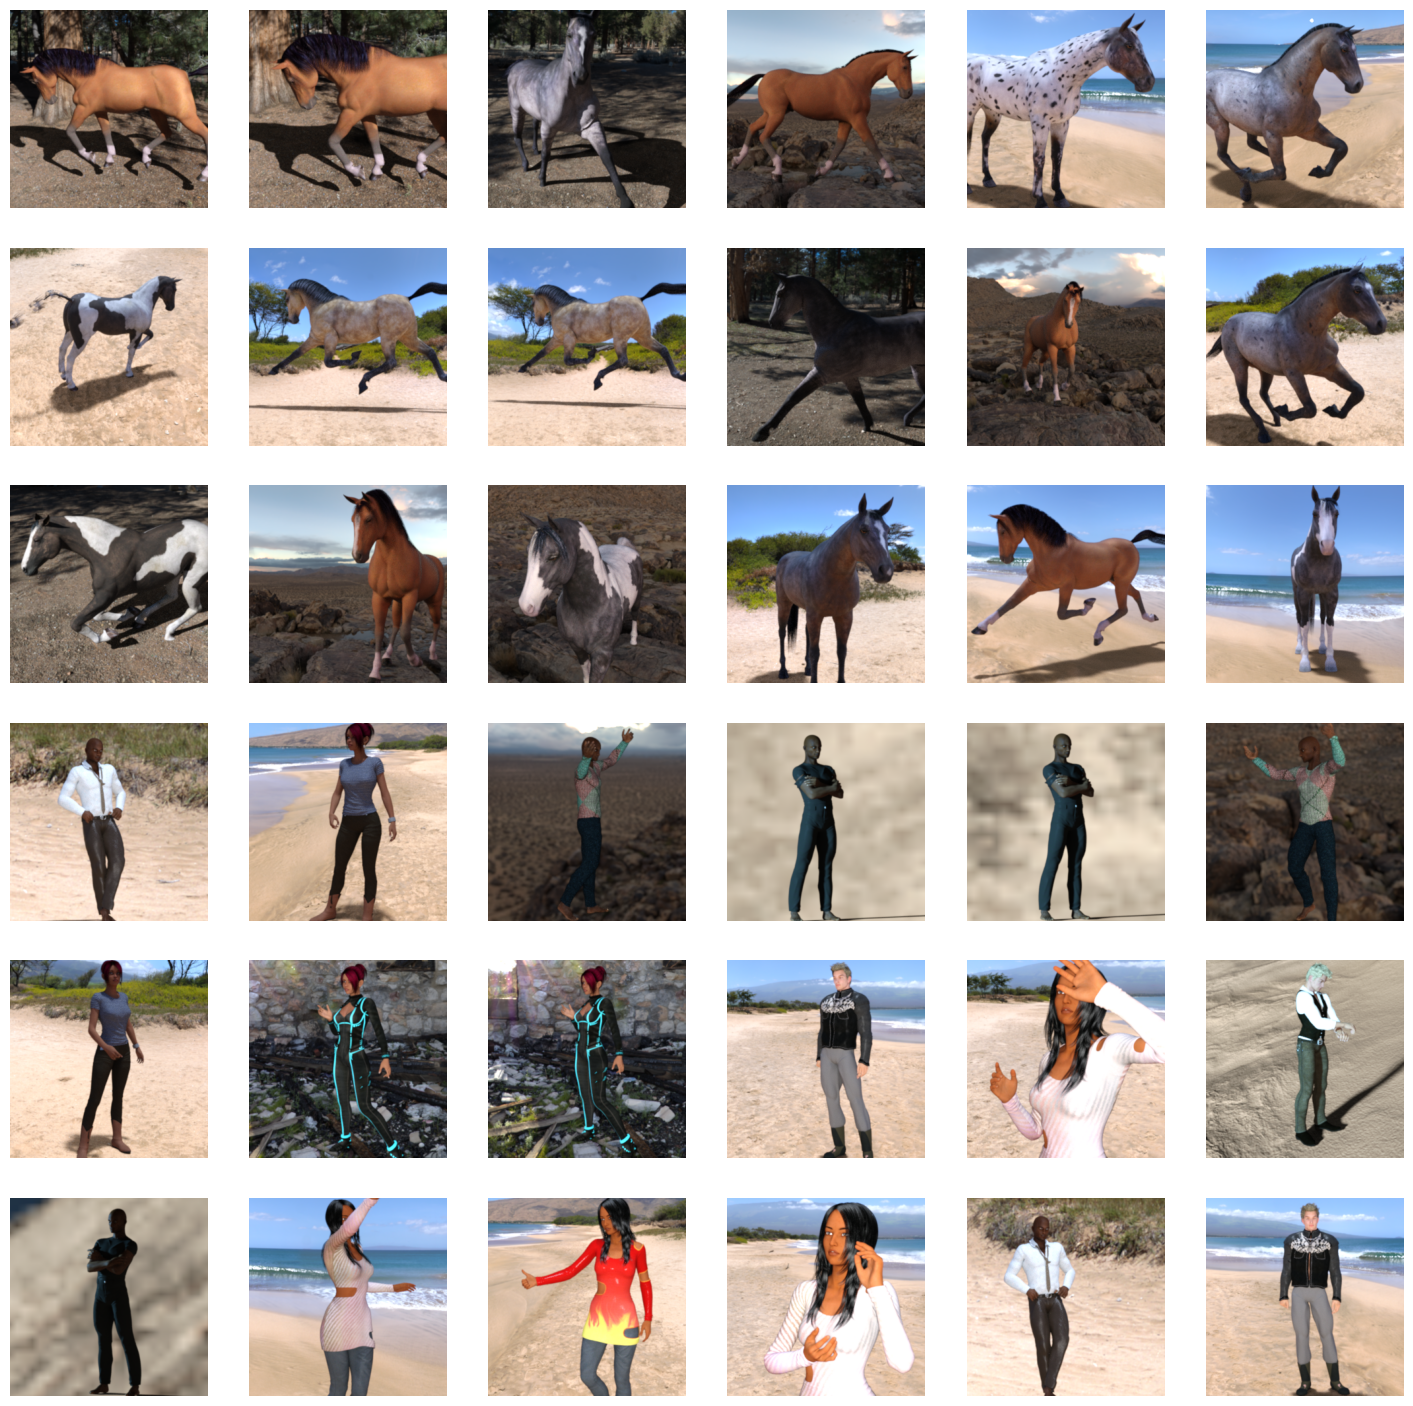

In [77]:
# print images for visualisation
train_horse_dir = os.path.join(train_dir,"horses")
train_human_dir = os.path.join(train_dir,"humans")
nrows = 6
ncols = 6

fig = plt.figure()
fig = fig.set_size_inches(nrows * 3, ncols * 3)

horse_images = [os.path.join(train_horse_dir,os.listdir(train_horse_dir)[i]) for i in np.random.randint(0, len(os.listdir(train_horse_dir)), 18)]
human_images = [os.path.join(train_human_dir,os.listdir(train_human_dir)[i]) for i in np.random.randint(0, len(os.listdir(train_human_dir)), 18)]

for i, picture in enumerate(horse_images + human_images):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    img = mpimg.imread(picture)
    plt.imshow(img)
plt.show()

In [98]:
human_image = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(human_images[1]))
print("Human image shape:", human_image.shape)

Human image shape: (300, 300, 3)


In [78]:
# Create training and validation datasets from directory
training_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            image_size = (150,150),
                                                            batch_size = 32,
                                                            label_mode = 'binary')
validation_data = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                            image_size = (150,150),
                                                            batch_size = 32,
                                                            label_mode = 'binary')

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


# Transfer learning with the InceptionV3 model

In [79]:
local_weights_file = os.path.join(os.getcwd(),"model\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\ngduy\AppData\Local\Temp\ipykernel_26996\1203821995.py:1: SyntaxWarning: invalid escape sequence '\i'
  local_weights_file = os.path.join(os.getcwd(),"model\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")


In [80]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (150,150,3),
    include_top = False,
    weights = None
)

# Loading the weights file
pre_trained_model.load_weights(local_weights_file)

# Making all layers of the pre-trained model untrainable
for layer in pre_trained_model.layers:
    layer.trainable = False

In [81]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_376 (Conv2D) │ (None, 74, 74,    │        864 │ input_layer_13[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │         96 │ conv2d_376[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_376      │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_377 (Conv2D) │ (None, 72, 72,    │      9,216 │ activation_376[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_377[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_377      │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_378 (Conv2D) │ (None, 72, 72,    │     18,432 │ activation_377[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_378[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_378      │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 35, 35,    │          0 │ activation_378[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_379 (Conv2D) │ (None, 35, 35,    │      5,120 │ max_pooling2d_16… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_379[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_379      │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_380 (Conv2D) │ (None, 33, 33,    │    138,240 │ activation_379[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_380[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_380      │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

We will use mixed7 as our base model and add our dense layers underneath the model


In [82]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [83]:
# Add dense layers for the base model
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Append the dense network to the base model
model = tf.keras.Model(inputs = pre_trained_model.input, outputs = x)
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_376 (Conv2D) │ (None, 74, 74,    │        864 │ input_layer_13[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │         96 │ conv2d_376[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_376      │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_377 (Conv2D) │ (None, 72, 72,    │      9,216 │ activation_376[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_377[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_377      │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_378 (Conv2D) │ (None, 72, 72,    │     18,432 │ activation_377[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_378[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_378      │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 35, 35,    │          0 │ activation_378[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_379 (Conv2D) │ (None, 35, 35,    │      5,120 │ max_pooling2d_16… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_379[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_379      │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_380 (Conv2D) │ (None, 33, 33,    │    138,240 │ activation_379[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_380[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_380      │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 28,243,873 (107.74 MB)

 Trainable params: 19,268,609 (73.50 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

## Preprocessing data used for transfer learning
The InceptionV3 documentation says that the inputs should be rescaled to the range [-1,1], therefore we have to process the data to satisfy this requirement

In [84]:
def preprocessing_data(image, lable):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, lable

training_data_scaled = training_data.map(preprocessing_data)
validation_data_scaled = validation_data.map(preprocessing_data)

In [85]:
# Optimize the datasets for training
shuffle_buffer_size = 1000
prefetch_buffer_size = tf.data.AUTOTUNE

training_data_final = (training_data_scaled
                       .cache()
                       .shuffle(shuffle_buffer_size)
                       .prefetch(prefetch_buffer_size))
validation_data_final = (validation_data_scaled
                       .cache()
                       .prefetch(prefetch_buffer_size))

## Data augmentation

In [86]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2)
])

In [87]:
# Attach data augmentation to the model
inputs = tf.keras.Input(shape = (150,150,3))
x = data_augmentation(inputs)
x = model(x)

model_with_augmentation = tf.keras.Model(inputs = inputs, outputs = x)

In [88]:
model_with_augmentation.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])

In [89]:
# Define callbacks function to stop the training process when the model metrics acquire the accuracy of greater than 99%
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs['accuracy']>0.99:
            print("The accuracy is greater than 99% >>> Stop training")
            self.model.stop_training = True

# Traing the model

In [90]:
history = model_with_augmentation.fit(training_data_final,
                            validation_data = validation_data_final,
                            epochs = 30,
                            verbose = 2,
                            callbacks = [EarlyStoppingCallback()])

Epoch 1/30
33/33 - 13s - 382ms/step - accuracy: 0.8413 - loss: 1.4205 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 2/30
33/33 - 6s - 190ms/step - accuracy: 0.9552 - loss: 0.1221 - val_accuracy: 1.0000 - val_loss: 8.8051e-04
Epoch 3/30
33/33 - 6s - 195ms/step - accuracy: 0.9357 - loss: 0.2138 - val_accuracy: 0.9961 - val_loss: 0.0098
Epoch 4/30
33/33 - 6s - 190ms/step - accuracy: 0.9581 - loss: 0.1478 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/30
33/33 - 6s - 191ms/step - accuracy: 0.9805 - loss: 0.0515 - val_accuracy: 1.0000 - val_loss: 3.3695e-04
Epoch 6/30
33/33 - 6s - 191ms/step - accuracy: 0.9698 - loss: 0.0946 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/30
33/33 - 6s - 190ms/step - accuracy: 0.9864 - loss: 0.0417 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/30
33/33 - 6s - 193ms/step - accuracy: 0.9805 - loss: 0.0645 - val_accuracy: 0.9961 - val_loss: 0.0084
Epoch 9/30
33/33 - 6s - 191ms/step - accuracy: 0.9796 - loss: 0.0561 - val_accuracy: 1.0000 - val_loss:

## Evaluate the model

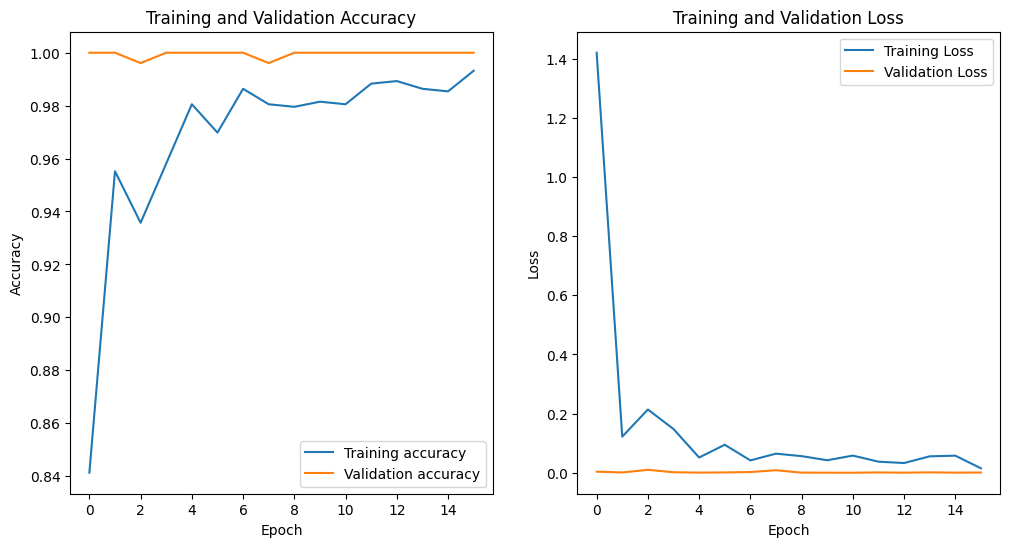

In [94]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))

fig,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].plot(epochs,train_acc,label = "Training accuracy")
ax[0].plot(epochs,val_acc,label = "Validation accuracy")
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs,train_loss,label = "Training Loss")
ax[1].plot(epochs,val_loss,label = "Validation Loss")
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()